originalFeatures count 9
originalFeatures Index(['timestamp', 'processId', 'parentProcessId', 'userId', 'eventId',
       'argsNum', 'returnValue', 'sus', 'evil'],
      dtype='object')
    timestamp  processId  parentProcessId  userId  eventId  argsNum  \
0  131.874057        382                1     101     1005        4   
1  131.874597        382                1     101      257        4   
2  131.874796        382                1     101        5        2   
3  131.874743        382                1     101        5        2   
4  131.874975        382                1     101        3        1   

   returnValue  sus  evil  
0            0    0     0  
1           15    0     0  
2            0    0     0  
3            0    0     0  
4            0    0     0  
originalFeatures count 9
originalFeatures Index(['timestamp', 'processId', 'parentProcessId', 'userId', 'eventId',
       'argsNum', 'returnValue', 'sus', 'evil'],
      dtype='object')
    timestamp  processId  parentP

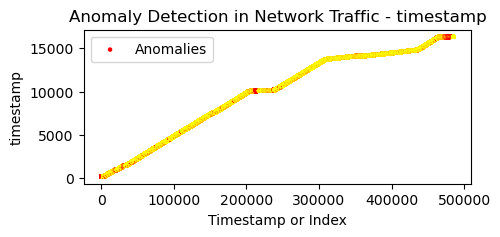

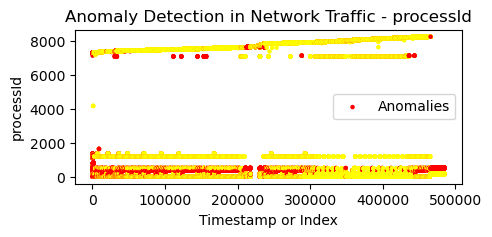

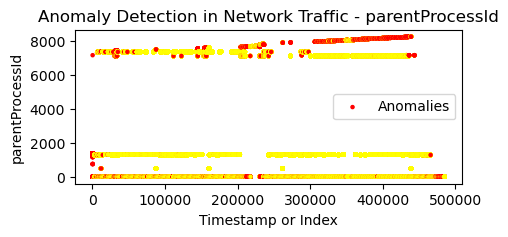

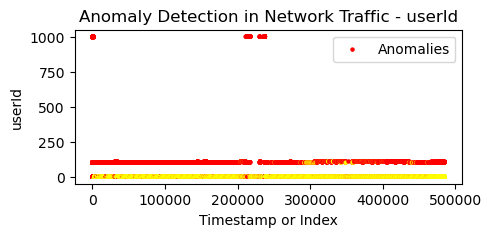

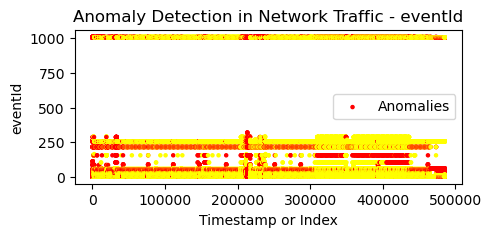

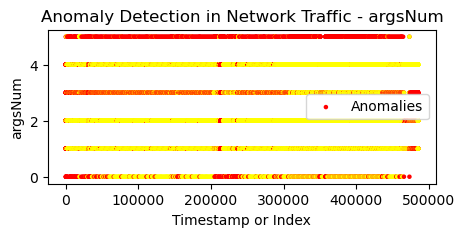

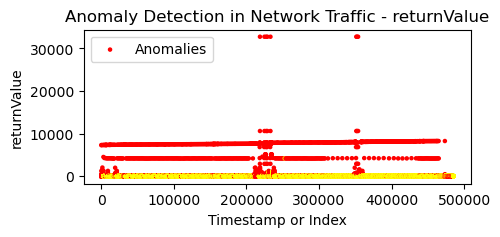

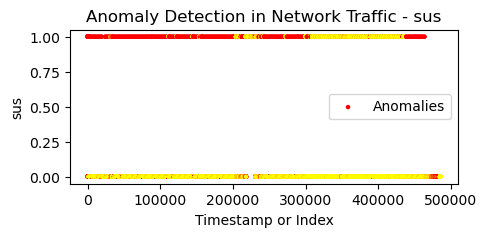

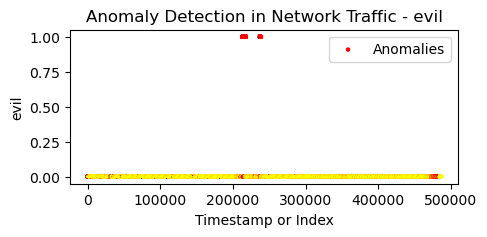

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

a = pd.read_csv("C:/Users/khatt/OneDrive/Desktop/labelled_2021may-ip-10-100-1-4.csv")
#This is for showing the length and the Number of features in the data set
originalFeatures = a.columns
print('originalFeatures count', len(originalFeatures))
print('originalFeatures',originalFeatures)
# This is for Displaying the first few rows of the dataset
print(a.head())

# Now I have Selected relevant features for anomaly detection
features = ['timestamp', 'processId', 'parentProcessId', 'userId',
        'eventId','argsNum', 'returnValue',
       'sus', 'evil']
X = a[features]

# Now I have Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now Initializing and training the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  
#You can Adjust the contamination based on the expected anomaly rate in the Dataset 
isolation_forest.fit(X_scaled)

# Predict anomalies (1 for normal, -1 for anomaly)
predictions = isolation_forest.predict(X_scaled)

# Add the anomaly predictions to the original dataframe
a['anomaly'] = predictions

# Visualize anomalies for each feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Replace 'your_data.csv' with your actual dataset
a = pd.read_csv("C:/Users/khatt/OneDrive/Desktop/labelled_2021may-ip-10-100-1-4.csv")
originalFeatures = a.columns
print('originalFeatures count', len(originalFeatures))
print('originalFeatures',originalFeatures)
# Display the first few rows of the dataset
print(a.head())

# Select relevant features for anomaly detection
features = ['timestamp', 'processId', 'parentProcessId', 'userId',
        'eventId','argsNum', 'returnValue',
       'sus', 'evil']
X = a[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on the expected anomaly rate
isolation_forest.fit(X_scaled)

# Predict anomalies (1 for normal, -1 for anomaly)
predictions = isolation_forest.predict(X_scaled)

# Adding the anomaly predictions to the original dataframe
a['anomaly'] = predictions

# Visualizing the anomalies for each feature by using 
for feature in features:
    plt.figure(figsize=(5, 2))
    plt.scatter(a.index, a[feature], c=np.where(a['anomaly'] == -1, 'red', 'yellow'), marker='o', s=5, label='Anomalies')
    plt.xlabel('Timestamp or Index')
    plt.ylabel(feature)
    plt.title(f'Anomaly Detection in Network Traffic - {feature}')
    plt.legend()
    plt.show()